Prova KG with neo4j

In [1]:
#pip install graphdatascience

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for neo4j: filename=neo4j-5.13.0-py3-none-any.whl size=265336 sha256=6e72efda2396264f92f36ffd90839b7a7f3b0f72cac397377c42a5fc8d08f218
  Stored in directory: c:\users\simone\appdata\local\pip\cache\wheels\7b\1d\b6\1be3a1e9de57bc832b7fcebbbf884186d8155bb6f1cc45be99
Successfully built neo4j
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Simone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
from graphdatascience import GraphDataScience
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
host = "bolt://localhost:7687"
user = "neo4j"
password= "simone98"

gds = GraphDataScience(host, auth=(user, password))

In [3]:
query = """
LOAD CSV WITH HEADERS FROM $url AS row
MERGE (s:Character {name:row.source})
MERGE (t:Character {name:row.target})
MERGE (s)-[i:INTERACTS]->(t)
SET i.weight = toInteger(row.weight)
"""
params = {'url': 'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/HP/hp_1.csv'}
gds.run_cypher(query, params)

""


In [5]:
G, metadata = gds.graph.project(
    "hp-graph", 
    "Character",
    {"INTERACTS": {"orientation": "UNDIRECTED", "properties": ["weight"]}}
)

Loading: 100%|██████████| 100.0/100 [00:06<00:00, 16.54%/s] 


In [6]:

print(G.name()) # hp-graph
print(G.memory_usage()) # 2341 KiB
print(G.density()) # 0.05782652043868395

hp-graph
2355 KiB
0.05782652043868395


In [7]:

pagerank_df = gds.pageRank.stream(G, relationshipWeightProperty="weight")
pagerank_df.head()

,nodeId,score
0,0,1.851142
1,1,3.241780
2,2,0.375610
3,3,0.375610
4,4,24.197442


In [9]:

pagerank_df['node_object'] = gds.util.asNodes(pagerank_df['nodeId'].to_list())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Harry Potter'),
  Text(1, 0, 'Ronald Weasley'),
  Text(2, 0, 'Hermione Granger'),
  Text(3, 0, 'Rubeus Hagrid'),
  Text(4, 0, 'Severus Snape'),
  Text(5, 0, 'Dudley Dursley'),
  Text(6, 0, 'Draco Malfoy'),
  Text(7, 0, 'Vernon Dursley'),
  Text(8, 0, 'Albus Dumbledore'),
  Text(9, 0, 'Neville Longbottom')])

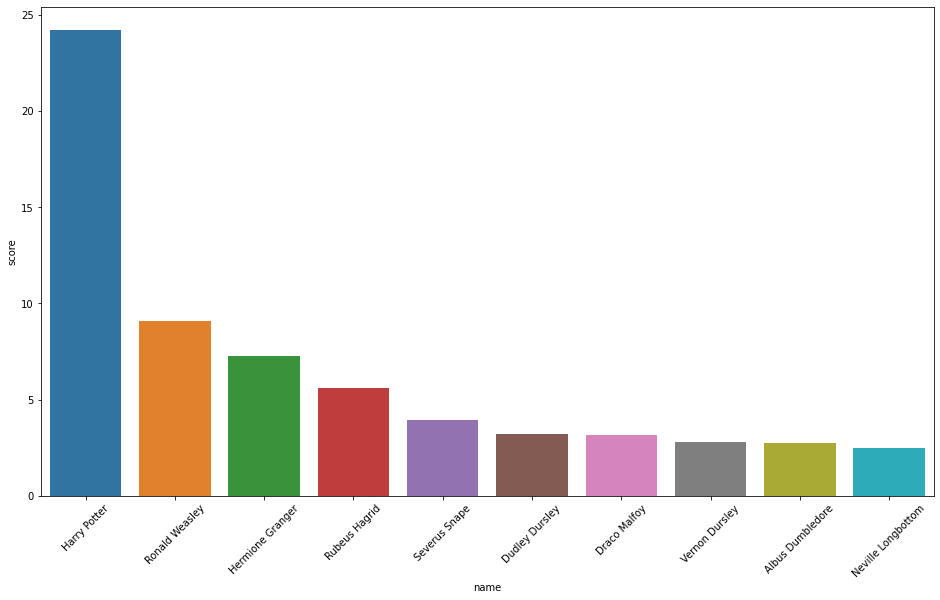

In [12]:
# Extract name properties from the node object
pagerank_df['name'] = [n['name'] for n in pagerank_df['node_object']]
# Draw a bar chart
plt.figure(figsize=(16,9))
sns.barplot(x='name', y='score', data=pagerank_df.sort_values(by='score', ascending=False).head(10))
plt.xticks(rotation=45)